In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os

In [4]:
os.getcwd()

'C:\\Users\\Adrian D02\\Desktop\\honours_text\\ABC Code\\abc_rejection_sample\\lotka_volterra'

In [3]:
current_path = os.getcwd()
models_path = os.path.join(current_path, "results")
models = os.listdir(models_path)
metric_path = os.path.join(models_path, models[0])
metrics = os.listdir(metric_path)

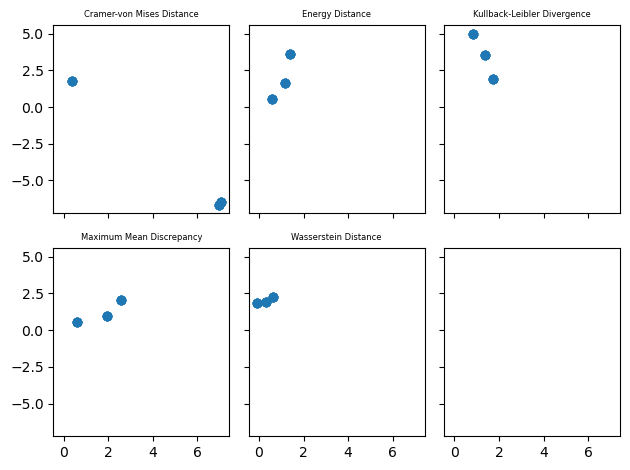

In [38]:
# Suppose we are only working with the first model
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
ax = ax.flatten()
for idx, metric in enumerate(metrics):
    posterior_path = os.path.join(metric_path, metric)
    os.chdir(posterior_path)
    posteriors = os.listdir(posterior_path)
    t_dict = {"a": np.array([]), "b": np.array([])}
    for posterior in posteriors:
        p = np.load(posterior)
        t_dict["a"] = np.concatenate((t_dict["a"], p[:,:,1][:,0]))
        t_dict["b"] = np.concatenate((t_dict["b"], p[:,:,1][:,1]))
    ax[idx].scatter(t_dict["a"], t_dict["b"])
    ax[idx].set_title(metric, fontsize=6)
fig.tight_layout()